<a href="https://colab.research.google.com/github/Champjiwrd/CE63-21-ObjectDetection/blob/master/Color_distinguish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://4.bp.blogspot.com/-ukjUU_JJ6y0/WxVha1617oI/AAAAAAAAXr8/xrXPfl2DWyE-WdxvBct-HCLYt_cwbO5owCLcBGAs/s400/yourname-02m22s.png

--2020-10-28 12:38:38--  https://4.bp.blogspot.com/-ukjUU_JJ6y0/WxVha1617oI/AAAAAAAAXr8/xrXPfl2DWyE-WdxvBct-HCLYt_cwbO5owCLcBGAs/s400/yourname-02m22s.png
Resolving 4.bp.blogspot.com (4.bp.blogspot.com)... 142.250.1.132, 2607:f8b0:4001:c24::84
Connecting to 4.bp.blogspot.com (4.bp.blogspot.com)|142.250.1.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161458 (158K) [image/png]
Saving to: ‘yourname-02m22s.png’

yourname-02m22s.png 100%[===================>] 157.67K  --.-KB/s    in 0.001s  

2020-10-28 12:38:38 (103 MB/s) - ‘yourname-02m22s.png’ saved [161458/161458]



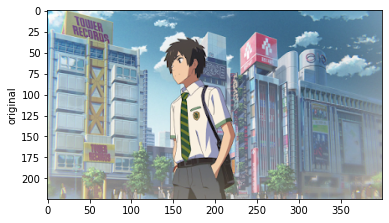

In [2]:
import matplotlib.pyplot as plt
import cv2

originalImage = cv2.imread('/content/yourname-02m22s.png')
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
plt.ylabel('original')
plt.show()

In [3]:
print(originalImage.shape)
x,y,dim = originalImage.shape
#get what x,y,color?
print(originalImage[0][0][2])

(225, 400, 3)
113


In [4]:
 import colorsys
 print(colorsys.rgb_to_hls(191, 191, 191)[2])

0.0


In [5]:
for i in range(x):
  for j in range(y):
    r = originalImage[i][j][0]

In [6]:
def checkcolor(hue,sat,lgt):
  if (lgt < 0.2):
    return "Blacks"
  if (lgt > 0.8):
    return "Whites"
  if (sat < 0.25):
    return "Grays"
  if (hue < 30):
    return "Reds"
  if (hue < 90):
    return "Yellows"
  if (hue < 150):
    return "Greens"
  if (hue < 210):
    return "Cyans"
  if (hue < 270):
    return "Blues"
  if (hue < 330):
    return "Magentas"
  return "Reds"

###Crop Image###
return รูป ใช้ pillow

crop_img(path,aw,bh,dw,ch)

In [7]:
from PIL import Image
def cropimg(path,aw,bh,dw,ch):
  image = Image.open(path)
  width, height = image.size
  a,b,c,d = getObjPosition(width,height,aw,bh,dw,ch)
  x,y = getStartPosition(a,b,c,d)
  box = (x, y, x+d, y+c)
  cropped_image = image.crop(box)
  return cropped_image

In [8]:
def getObjPosition(width,height,aw,bh,dw,ch):
  a = aw*width
  b = bh*height
  c = ch*height
  d = dw*width
  return a,b,c,d

In [9]:
def getStartPosition(a,b,c,d):
  x = a-d/2
  y = b-c/2
  return(x,y)

In [14]:
cropped_img = cropimg("yourname-02m22s.png",0.458137, 0.594340, 0.194575, 0.446541)

# Test Image Color distinguishment

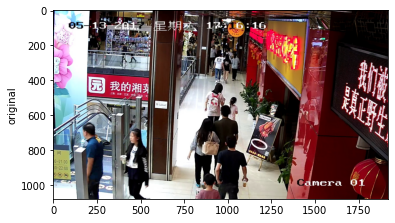

In [108]:
imagename = '0315cd7050cd6bd64470dbc21b838756'

originalImage = cv2.imread('/content/' + imagename+ '.jpg')
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
plt.ylabel('original')
plt.show()

Read txt bounding box file

In [82]:
f = open(imagename + ".txt", "r")
f = f.read()
print(f)

15 0.120573 0.789815 0.056771 0.205556
15 0.252344 0.764815 0.064062 0.148148
15 0.535677 0.825463 0.085938 0.197222
15 0.466927 0.973611 0.066146 0.052778
15 0.453646 0.699537 0.089583 0.137963
15 0.516406 0.648611 0.072396 0.147222
15 0.483594 0.493056 0.053646 0.147222
15 0.535677 0.537037 0.031771 0.079630
15 0.496615 0.280556 0.025521 0.066667
15 0.520573 0.290741 0.021354 0.062963
15 0.479948 0.225000 0.017188 0.048148
15 0.238281 0.205556 0.013021 0.035185



In [83]:
f = f.split('\n')
f = f[:-1]
print(f, len(f))

['15 0.120573 0.789815 0.056771 0.205556', '15 0.252344 0.764815 0.064062 0.148148', '15 0.535677 0.825463 0.085938 0.197222', '15 0.466927 0.973611 0.066146 0.052778', '15 0.453646 0.699537 0.089583 0.137963', '15 0.516406 0.648611 0.072396 0.147222', '15 0.483594 0.493056 0.053646 0.147222', '15 0.535677 0.537037 0.031771 0.079630', '15 0.496615 0.280556 0.025521 0.066667', '15 0.520573 0.290741 0.021354 0.062963', '15 0.479948 0.225000 0.017188 0.048148', '15 0.238281 0.205556 0.013021 0.035185'] 12


Visualize object bounding box

In [115]:
# for element in list of object in picture
# only one object here, i.e., f[2]
i = 2
bbinfo = f[i]
height, width, dim = originalImage.shape
print(width, height)
buff = f[i].split(' ')
print(buff)
classObj = int(buff[0])
centerx_Obj, centery_Obj = round(width*float(buff[1])), round(height*float(buff[2]))
widthObj, heightObj = round(width*float(buff[3])), round(height*float(buff[4]))
print(centerx_Obj, centery_Obj, widthObj, heightObj)

1920 1080
['15', '0.535677', '0.825463', '0.085938', '0.197222']
1028 892 165 213


(945, 785) (1110, 998)


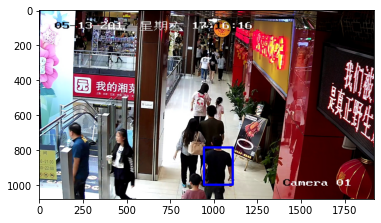

In [117]:
import cv2  
image = cv2.imread(imagename + '.jpg')

# calculate start point and end point to draw rectangle
start_point = (int(centerx_Obj-widthObj/2), int(centery_Obj-heightObj/2)) 
end_point = (int(centerx_Obj+widthObj/2), int(centery_Obj+heightObj/2)) 
print(start_point, end_point)
# Blue color in BGR 
color = (255, 0, 0) 
# Line thickness of 2 px 
thickness = 12
drewimage = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
# Displaying the image  
plt.imshow(cv2.cvtColor(drewimage, cv2.COLOR_BGR2RGB))
plt.show()

Criteria for color classification (Black = class number 0)

In [ ]:
'''
  if (lgt < 0.2):
    return "Blacks" ===> 0
  if (lgt > 0.8):
    return "Whites" ===> 1
  if (sat < 0.25):
    return "Grays" ===> 2
  if (hue < 30):
    return "Reds" ===> 3
  if (hue < 90):
    return "Yellows" ===> 4
  if (hue < 150):
    return "Greens" ===> 5
  if (hue < 210):
    return "Cyans" ===> 6
  if (hue < 270):
    return "Blues" ===> 7
  if (hue < 330):
    return "Magentas" ===> 8
  return "Reds" ===> 9
'''

Calculate color in the box